<a href="https://colab.research.google.com/github/priyanka2109/eluvio-ds-assignment/blob/main/Eluvio_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#For Loading data and performing certain operations
import numpy as np
import pandas as pd

#For Data preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
ls= WordNetLemmatizer()

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt #for customisation
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Loading the dataset 
df= pd.read_csv("Eluvio_DS_Challenge.csv")
df.head()


,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


# Data Analysis

In [4]:
df.describe()

,time_created,up_votes,down_votes
count,5.092360e+05,509236.000000,509236.0
mean,1.380240e+09,112.236283,0.0
std,7.090436e+07,541.694675,0.0
min,1.201232e+09,0.000000,0.0
25%,1.341585e+09,1.000000,0.0
50%,1.392909e+09,5.000000,0.0
75%,1.436527e+09,16.000000,0.0
max,1.479817e+09,21253.000000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB


In [6]:
#Finding some relevant infromation from dataset
print("Total number of news headlines : ", df.shape[0]) #shape of data
print("Total number of authors : ", df["author"].nunique()) #unique number of authors
print("Total number of unqiue categories : ", df["category"].nunique())#unique category of headlines
print("Total number of unqiue time stamps : ", df["date_created"].nunique())#unique dates
print("Total number of unqiue downvotes : ", df["down_votes"].nunique())#unique number of downvotes

Total number of news headlines :  509236
Total number of authors :  85838
Total number of unqiue categories :  1
Total number of unqiue time stamps :  3223
Total number of unqiue downvotes :  1


1. We can clearly see that there is only one category for headline and the number of down votes are also same for every row.
2. The difference in timestamp is also in seconds, so we can filter it out too.


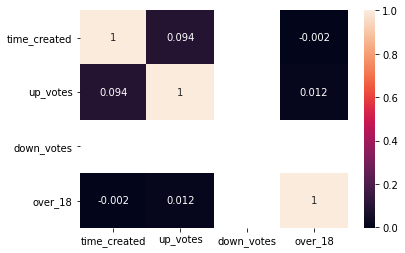

In [7]:
#Plotting the relation between df variables
sns.heatmap(df.corr(), annot=True)

In [8]:
#Considering the dataset which contains only author, up_votes and title
df_sub=df.drop(['time_created','date_created','down_votes','over_18','category'],axis=1)

The above filtered dataset will be used to see that what is the relation between number of newsheadline titles and number of 
up_votes for every author.

In [9]:
df_sub.head()

,up_votes,title,author
0,3,Scores killed in Pakistan clashes,polar
1,2,Japan resumes refuelling mission,polar
2,3,US presses Egypt on Gaza border,polar
3,1,Jump-start economy: Give health care to all,fadi420
4,4,Council of Europe bashes EU&UN terror blacklist,mhermans


In [10]:
auth_line={} #dictionary for storing author and their total headline count
auth_vote={} #dictionary for storing author and their total upvotes count

for i in range(0,509236):
  author=str(df['author'][i])
  vote_val=int(df['up_votes'][i])
  if author not in auth_line.keys():
    auth_line.update({author:1})
  else:
    auth_line[author]+=1
  if author not in auth_vote.keys():
    auth_vote.update({author:vote_val})
  else:
    auth_vote[author]=auth_vote[author]+vote_val

    

In [11]:
#Making a dataframe from the above dictionaries for checking the relation between author's upvotes count and headline count
auth_line_vote=[]
auth_line_vote=pd.DataFrame(auth_line_vote)
auth_line_vote['author']=auth_vote.keys()
auth_line_vote['headline_count']=auth_line.values()
auth_line_vote['upvote_count']=auth_vote.values()

In [12]:
auth_line_vote.head()

,author,headline_count,upvote_count
0,polar,50,1151
1,fadi420,2,1
2,mhermans,1,4
3,Armagedonovich,2,18
4,Clythos,6,28


In [13]:
#Sorting on the basis of upvotes
upvote_sort=auth_line_vote.sort_values(by=['upvote_count'])
upvote_sort

,author,headline_count,upvote_count
42918,donatebaba,1,0
43562,robasolo,1,0
43560,SkyFall0007,1,0
43557,FakeAudio,1,0
43552,mandyivy,1,0
...,...,...,...
53629,Wagamaga,1490,580121
17630,DoremusJessup,5037,584380
24853,Libertatea,2108,832102
7925,anutensil,5730,1531544


In [14]:
#Sorting on the basis of headlines
headline_sort=auth_line_vote.sort_values(by=['headline_count'])
headline_sort

,author,headline_count,upvote_count
42918,donatebaba,1,0
50494,sydneyreynolds,1,614
50495,uchet,1,0
50496,msilver5,1,2
50497,Dhimmicrat,1,5
...,...,...,...
107,igeldard,4013,51461
295,maxwellhill,4023,1985416
17630,DoremusJessup,5037,584380
7925,anutensil,5730,1531544


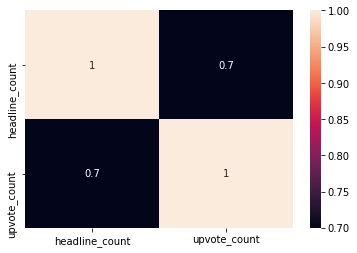

In [15]:
#Checking the correlation graph between above two
sns.heatmap(headline_sort.corr(),annot=True)

From the above correlation graph, we can observe that the more the number of headlines, the more are the upvotes.

In [16]:
#Considering a small subset of the dataset
df_new=df.loc[0:5000,['up_votes','author']]

In [17]:
#Plotting the graph between author and the number of upvotes an author has got
fig = go.Figure([go.Bar(x=df_new["author"].value_counts().index, y=df_new["up_votes"])])
fig['layout'].update(title={"text" : 'Distribution of authors on the basis of up votes','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="name of author",yaxis_title="Number of upvotes")
fig.update_layout(width=800,height=700)
fig

In [18]:
#Checking the length of news headlines of whole dataset
fig = ff.create_distplot([df['title'].str.len()], ["ht"],show_hist=False,show_rug=False)
fig['layout'].update(title={'text':'PDF','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}, xaxis_title="Length of a headline",yaxis_title="probability")
fig.update_layout(showlegend = False,width=500,height=500)
fig

From the above graph, we can clearly see that on an average, the length of news headlines is between 0-100(55 having the highest probability).

# Data Preprocessing and Feature Selection

In [19]:
#removing the unnecessary columns 
df=df.drop(['time_created','date_created','down_votes','over_18','category'],axis=1)
df.head()

,up_votes,title,author
0,3,Scores killed in Pakistan clashes,polar
1,2,Japan resumes refuelling mission,polar
2,3,US presses Egypt on Gaza border,polar
3,1,Jump-start economy: Give health care to all,fadi420
4,4,Council of Europe bashes EU&UN terror blacklist,mhermans


In [20]:
#Chceking for null values for the dataset
df.isna().sum()

up_votes    0
title       0
author      0
dtype: int64

In [21]:
#storing the news headlines in an array for applying further preprocessing
sentences=df['title']

In the following cell, the basic preprocessing has been done. And stored in a new csv(pre_pro_text.csv) file, so that the following code block does not have to be run again and again. Since the dataset is quite large, and thus takes a considerable amount of time.

In [ ]:
corpus = []
for i in range(0, len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i]) #keeping only alphabets and removing all other characters 
    review = review.lower() #converting to lowercase
    review = review.split()
    
    review = [ls.lemmatize(word) for word in review if not word in stopwords.words('english')] #performing lemmatisation
    review = ' '.join(review)
    corpus.append(review) #appending to the array corpus

In [ ]:
#Saving the preprocesed text in the csv file
corpus=pd.DataFrame(corpus)
corpus.to_csv('pre_pro_text.csv')

In [22]:
#Loading the data of pre-processed text obtained from the above cell.
corpus_sheet=pd.read_csv('pre_pro_text.csv')
corpus_sheet.head()

,Unnamed: 0,0
0,0,score killed pakistan clash
1,1,japan resume refuelling mission
2,2,u press egypt gaza border
3,3,jump start economy give health care
4,4,council europe bash eu un terror blacklist


In [23]:
#Adding the upvotes column to the dataset for further use
corpus_sheet['upvotes']=df['up_votes']

In [24]:
#removing the extra column
corpus_sheet=corpus_sheet.drop('Unnamed: 0',axis=1)

In [25]:
#Renaming the headline column
corpus_sheet=corpus_sheet.rename(columns={'0':'headline'})
corpus_sheet.head()

,headline,upvotes
0,score killed pakistan clash,3
1,japan resume refuelling mission,2
2,u press egypt gaza border,3
3,jump start economy give health care,1
4,council europe bash eu un terror blacklist,4


In [26]:
#Loading the dataset column of newsheadline into corpus array
corpus=corpus_sheet['headline']
corpus

0                               score killed pakistan clash
1                           japan resume refuelling mission
2                                 u press egypt gaza border
3                       jump start economy give health care
4                council europe bash eu un terror blacklist
                                ...                        
509231    heil trump donald trump alt right white nation...
509232            people speculating could madeleine mccann
509233             professor receives arab researcher award
509234    nigel farage attack response trump ambassador ...
509235    palestinian wielding knife shot dead west bank...
Name: headline, Length: 509236, dtype: object

In [27]:
#Making a dictionary of words present in the whole dataset for analysis

words_dic=[]
for row in range(0,509236):
    line=str(corpus_sheet['headline'][row])
    line=line.split(" ")
    for word in line:
        words_dic.append(word)

In [28]:
#lenth of whole dictionary
len(words_dic)

5109123

In [29]:
#printing 4 elements of the word dictionary
words_dic[0:4]

['score', 'killed', 'pakistan', 'clash']

In [30]:
#making the word count dictionary, which stores the frequecy of the words occurring
word_count={}
for word in words_dic:
    if word in word_count.keys():
        word_count[word]+=1
    else:
        word_count[word]=1
word_count

{'score': 607,
 'killed': 14329,
 'pakistan': 8469,
 'clash': 3274,
 'japan': 8740,
 'resume': 656,
 'refuelling': 14,
 'mission': 1796,
 'u': 46329,
 'press': 1732,
 'egypt': 8325,
 'gaza': 6574,
 'border': 6084,
 'jump': 329,
 'start': 2230,
 'economy': 2855,
 'give': 2953,
 'health': 2597,
 'care': 723,
 'council': 2159,
 'europe': 5966,
 'bash': 49,
 'eu': 8794,
 'un': 10133,
 'terror': 4366,
 'blacklist': 180,
 'hay': 22,
 'presto': 1,
 'farmer': 1030,
 'unveils': 533,
 'illegal': 2259,
 'mock': 236,
 'tudor': 6,
 'castle': 92,
 'tried': 945,
 'hide': 290,
 'behind': 2119,
 'ft': 251,
 'bale': 17,
 'strike': 7647,
 'protest': 10793,
 'gridlock': 26,
 'poland': 1249,
 'ukraine': 10477,
 'n': 5257,
 'mismanagement': 37,
 'program': 1733,
 'nicolas': 368,
 'sarkozy': 605,
 'threatens': 2249,
 'sue': 888,
 'ryanair': 71,
 'plan': 7670,
 'missile': 4433,
 'shield': 478,
 'polish': 752,
 'town': 3342,
 'met': 554,
 'resistance': 487,
 'video': 5700,
 'archbishop': 218,
 'canterbury': 60

In [31]:
#listing the most frequent 50 words
sorted(word_count.items(),reverse=True, key = lambda x: x[1] )[:50]

[('u', 46329),
 ('say', 32919),
 ('china', 26405),
 ('new', 23389),
 ('year', 21192),
 ('attack', 19820),
 ('syria', 19029),
 ('russia', 18773),
 ('world', 18244),
 ('state', 17095),
 ('government', 17014),
 ('police', 16660),
 ('israel', 16076),
 ('iran', 15834),
 ('president', 15414),
 ('killed', 14329),
 ('people', 14103),
 ('war', 13278),
 ('russian', 13255),
 ('country', 12966),
 ('minister', 11977),
 ('military', 11866),
 ('uk', 11799),
 ('leader', 11644),
 ('korea', 11634),
 ('north', 11589),
 ('south', 11553),
 ('news', 11501),
 ('syrian', 11003),
 ('india', 10954),
 ('official', 10829),
 ('report', 10806),
 ('protest', 10793),
 ('force', 10753),
 ('said', 10744),
 ('first', 10742),
 ('two', 10707),
 ('ukraine', 10477),
 ('woman', 10468),
 ('death', 10374),
 ('israeli', 10220),
 ('right', 10192),
 ('un', 10133),
 ('nuclear', 10096),
 ('one', 9712),
 ('kill', 9403),
 ('isi', 9242),
 ('court', 9013),
 ('group', 9008),
 ('eu', 8794)]

The above list shows the most frequent words .  This signifies that most of the news headlines are about these. So lets's figure how that how many such headlines are there with these words. Here I have taken 4 words into consideration: china, russia, syria and police

In [32]:
#initialising array for all frequnetly occurring words

china_headlines=[]
china_upvotes=[]

syria_headlines=[]
syria_upvotes=[]

russia_headlines=[]
russia_upvotes=[]

police_headlines=[]
police_upvotes=[]

In [33]:
#Function for appending newsheadline and upvotes of particular word in their respective array(ex: if word=='iraq', then all the 
#news headlines containing word iraq will get appended in iraq_headlines and the upvotes will be appended to iraq_upvotes)
def get_headline_upvote(corpus_sheet,word):
    headlines=[]
    upvote_arr=[]
    for row in range(0,509236):
        headline_word=str(corpus_sheet['headline'][row])
        upvotes=int(corpus_sheet['upvotes'][row])
        if word in headline_word:
            headlines.append(headline_word)     
            upvote_arr.append(upvotes)
    return headlines,upvote_arr

In [34]:
#getting china headlines and upvotes
china_headlines,china_upvotes=get_headline_upvote(corpus_sheet,'china')

In [35]:
#getting syria headlines and upvotes
syria_headlines,syria_upvotes=get_headline_upvote(corpus_sheet,'syria')

In [36]:
#getting russia headlines and upvotes
russia_headlines,russia_upvotes=get_headline_upvote(corpus_sheet,'russia')

In [37]:
#getting police headlines and upvotes
police_headlines,police_upvotes=get_headline_upvote(corpus_sheet,'police')

In [38]:
# Finction for the concatenation of headlines array and upvotes array (ex: if headlines_arr="iraq_headlines", and upvotes_arr=
#"iraq_upvotes", then iraq_df is the concatenated dataframe of both arrays)
def make_df(headlines_arr,upvotes_arr):
    headlines_arr=pd.DataFrame(headlines_arr)
    upvotes_arr=pd.DataFrame(upvotes_arr)
    final_arr=pd.concat([headlines_arr,upvotes_arr],axis=1)
    return final_arr

In [39]:
#Calling the make_df function for all the words taken into consideration
china_df=make_df(china_headlines,china_upvotes)
syria_df=make_df(syria_headlines,syria_upvotes)
russia_df=make_df(russia_headlines,russia_upvotes)
police_df=make_df(police_headlines,police_upvotes)


In [40]:
# Making the final dataframe by concatenating the above 4 dataframes
final_df=pd.concat([china_df,syria_df,russia_df,police_df])

In [41]:
final_df.head()

,0,0
0,hyperurbanization china,2
1,russia china challenge u proposal ban space we...,27
2,russia china challenge u space arm,0
3,mix blamed fda failure china heparin plant,1
4,china asks nicely web site cut porn violence h...,2


In [42]:
#Renaming the columns
final_df.columns=['headline','upvotes']

In [43]:
final_df.head()

,headline,upvotes
0,hyperurbanization china,2
1,russia china challenge u proposal ban space we...,27
2,russia china challenge u space arm,0
3,mix blamed fda failure china heparin plant,1
4,china asks nicely web site cut porn violence h...,2


In [44]:
#sorting the dataset to see the least voted headlines
final_df.sort_values(by=['upvotes'])

,headline,upvotes
6066,syria asks deserter come home bomb blast kill,0
19880,uk envoy make new legal argument drone killing...,0
12361,china take million vehicle road,0
17536,new greek govt object eu call sanction russia,0
12363,vietnam china trade barb vietnamese fishing bo...,0
...,...,...
24482,u state dept declares isi committing genocide ...,8830
17162,thousand prehistoric mammoth tusk dug melting ...,8900
22824,giant panda longer endangered specie following...,9316
19513,isi beheads year old pioneer archaeologist for...,10515


From above dataset, we can see that the least voted headlines, from the final df are
1. syria asks deserter come home bomb blast kill	
2. uk envoy make new legal argument drone killing...
3. china take million vehicle road	
4. new greek govt object eu call sanction russia
5. vietnam china trade barb vietnamese fishing bo...

In [45]:
#Sorting the dataset in reverse order to find most upvotes headlines
final_df.sort_values(by=['upvotes'],ascending=False)

,headline,upvotes
12192,police officer leaked footage surfer paradise ...,12333
19513,isi beheads year old pioneer archaeologist for...,10515
22824,giant panda longer endangered specie following...,9316
17162,thousand prehistoric mammoth tusk dug melting ...,8900
24482,u state dept declares isi committing genocide ...,8830
...,...,...
3890,al qaeda hand detected syria conflict,0
22675,russian airline brokeup mid air,0
3888,syrian chemical weapon arsenal include hoard i...,0
26221,china provide aid enhance military training sy...,0


From the above function, we can see that the most upvoted headlines are:
1. police officer leaked footage surfer paradise 
2. isi beheads year old pioneer archaeologist for..
3. giant panda longer endangered specie following.
4. thousand prehistoric mammoth tusk dug melting
5. u state dept declares isi committing genocide 

# Conclusion-1

1. We can see that the dataset mainly contains news about the attacks and location where these are taking place.
2. We also saw that though the word frequency of china was highest among all the countries, but it was not even 50% of the dataset. This shows, that more news headlines are about the action or consequence of attacks, wars and the steps being taken for them.

# Sentiment Analysis

In [46]:
#printing the mean number of votes
print(np.mean(df['up_votes']))

112.23628337352426


Considering the mean number of upvotes, we can decide this as the threshhold for our new column 'sentiment'.
ex: if the upvotes, of a particular author is greater than the mean value, then we will say it a positive sentiment/positive news.
else if it will be given a negative sentiment.

In [47]:
#Loading the dataset
sentiment_data=corpus_sheet
# positive sentiment : 1    negative sentiment : 0
sentiment_data['sentiment']= (corpus_sheet['upvotes']>=112).astype(int)

In [48]:
sentiment_data.head()

,headline,upvotes,sentiment
0,score killed pakistan clash,3,0
1,japan resume refuelling mission,2,0
2,u press egypt gaza border,3,0
3,jump start economy give health care,1,0
4,council europe bash eu un terror blacklist,4,0


In [49]:
#removing the upvotes column
sentiment_data=sentiment_data.drop('upvotes',axis=1)

In [50]:
sentiment_data.head()

,headline,sentiment
0,score killed pakistan clash,0
1,japan resume refuelling mission,0
2,u press egypt gaza border,0
3,jump start economy give health care,0
4,council europe bash eu un terror blacklist,0


In [53]:
sentiment_data=sentiment_data.dropna()

In [54]:
# Loading and Splitting the dataset into training and test dataset
from sklearn.model_selection import train_test_split

X = sentiment_data['headline']
y = sentiment_data['sentiment']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2020)

In [55]:
#Using the tf-idf vectorisation for convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF
tf_idf = TfidfVectorizer(smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train)
X_val_tfidf = tf_idf.transform(X_val)

In [56]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

Best alpha:  1.0


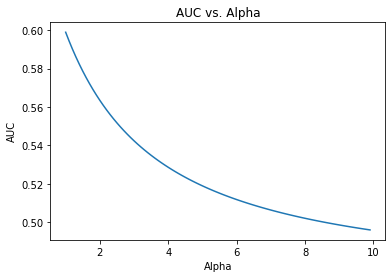

In [57]:
#Using naive bayes for sentiment classification
from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

#Plotting graph for obtaining best alpha value
plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [58]:
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.5898
Accuracy: 90.48%


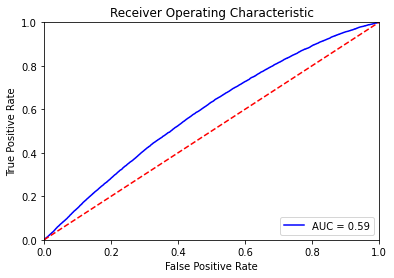

In [59]:
# Compute predicted probabilities
nb_model = MultinomialNB(alpha=1.8)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

# Evaluate the classifier
evaluate_roc(probs, y_val)

# Clustering the authors on the basis of news headlines

In the below cell, I have tried to convert the headlines text into vectors using bag of words approach. Since the dataset is large, the converted vectors have been saved in another csv file and loaded directly for any further use.

In [60]:
#dropping the null rows
corpus_sheet=corpus_sheet.dropna()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 56) #max features mean total unique words in a sentence

X = cv.fit_transform(corpus_sheet['headline']).toarray()

In [ ]:
X=pd.DataFrame(X)
X.to_csv('BOW_1.csv') #saving the final sheet in a csv file so that it can be reused

In [61]:
#Loading the datset
data1=pd.read_csv('BOW_1.csv')

In [62]:
#converting to numpy array
print(type(data1.to_numpy()))

<class 'numpy.ndarray'>


In [63]:
#considering a small subset of dataset
D1=data1.iloc[0:10000,0:57]

In [65]:
    #trying to find the optimal value of clusters using silhoutte score  
    from sklearn.metrics import silhouette_samples, silhouette_score
    from sklearn.cluster import KMeans
    sil = []
    kmax = 10
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(D1)
        labels = kmeans.labels_
        sil.append(silhouette_score(D1, labels, metric = 'euclidean'))
        
    maxpos = sil.index(max(sil))
    n_clusters = maxpos + 2
    

In [66]:
# Divide into k groups using k-mean clustering
model = KMeans(n_clusters=n_clusters, init='k-means++',
               max_iter=100, n_init=100)
model.fit(D1)
    
# Create group label column
groups = list(model.labels_)

In [67]:
#printing the groups of first 1 lakh authors
print(groups)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Conclusion -2

1. Since the maximum cluster value i gave to the model was 11, so first 1 lakh authors got divided in a group of 2. This shows that the way the authors write news headlines is not much different from each other
